# AUROC


In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import os
# do we have the correct env loaded?
assert 'donkey2' == os.environ['CONDA_DEFAULT_ENV'], os.environ['CONDA_DEFAULT_ENV']

In [2]:
import numpy as np

fast_model_fast_data = np.load("nighttime_ai_fast_model_fast_data_activations.npy")
fast_model_slow_data = np.load("nighttime_ai_fast_model_slow_data_activations.npy")
slow_model_fast_data = np.load("nighttime_ai_slow_model_fast_data_activations.npy")
slow_model_slow_data = np.load("nighttime_ai_slow_model_slow_data_activations.npy")

[d.shape for d in (fast_model_fast_data, fast_model_slow_data, slow_model_fast_data, slow_model_slow_data)]


[(19250, 256), (20304, 256), (19250, 256), (20304, 256)]

In [20]:
def mahalanobis(x, data, cov=None):
    x_mu = x - np.mean(data, axis=0) # or np.mean(data) ?
    if not cov:
        cov = np.cov(data.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()


fast_IND_mahal = mahalanobis(fast_model_fast_data, fast_model_fast_data)

In [21]:

fast_OOD_mahal = mahalanobis(fast_model_slow_data, fast_model_slow_data)

LinAlgError: Singular matrix

In [22]:

slow_IND_mahal = mahalanobis(slow_model_slow_data, slow_model_slow_data)

In [23]:

slow_OOD_mahal = mahalanobis(slow_model_fast_data, slow_model_fast_data)


In [ ]:
fast_IND_mahal = np.vstack([fast_IND_mahal, np.zeros(len(fast_IND_mahal))]).T
# fast_OOD_mahal = np.vstack([fast_OOD_mahal, np.ones(len(fast_OOD_mahal))]).T
slow_IND_mahal = np.vstack([slow_IND_mahal, np.zeros(len(slow_IND_mahal))]).T
slow_OOD_mahal = np.vstack([slow_OOD_mahal, np.ones(len(slow_OOD_mahal))]).T


In [36]:

data = np.concatenate((fast_IND_mahal,
                # fast_OOD_mahal,
                slow_IND_mahal,
                slow_OOD_mahal))

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
data[:,0] = min_max_scaler.fit_transform(data[:,0].reshape(-1, 1))[:,0]
data

(58804, 2)

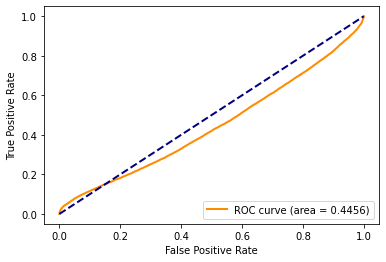

In [40]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc

lw = 2
fpr, tpr, _ = roc_curve(data[:,1], data[:,0])
roc_auc = auc(fpr, tpr)
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.4f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


